In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from  matplotlib import font_manager

from numpy import random

import seaborn as sns
import july

In [3]:
df = pd.DataFrame()
for i in ['MyData/StreamingHistory0.json',
         'MyData/StreamingHistory1.json',
         'MyData/StreamingHistory2.json',
         'MyData/StreamingHistory3.json']:
    data_frame = pd.read_json(i)
    df=pd.concat([df, data_frame], axis = 0)

In [4]:
df['endTime'] = pd.to_datetime(df.endTime)
df['date'] = df.endTime.dt.date
df['month'] = df.endTime.dt.month
df['week'] = df.endTime.dt.isocalendar().week
df['day_of_week'] = df.endTime.dt.dayofweek
df['hour'] = df.endTime.dt.hour

df['part_of_the_day'] = pd.cut(df.hour,bins=[-1, 5, 12, 17, 21, 23],
                               labels=['Night', 'Morning', 'Afternoon','Evening', 'Night'],
                               ordered=False)
df['hours_played'] = df.msPlayed / (60 * 60 * 1000)

In [5]:
#### Functions!
def get_top_n_artists(df, n):
    """Returns a list of artist-streamed_hours of your top N streamed artists"""
    return df.groupby('artistName')\
        .agg({'hours_played': np.sum})\
        .sort_values(by=['hours_played'], ascending=True)\
        .tail(n)

def get_streamed_hours_by_time_of_day(df):
    """Returns a list of time_of_the_day-hours_played"""
    return df.groupby('hour').agg({'hours_played': np.sum})

def get_streamed_hours_by_day_of_week(df):
    """Returns a list of streamed hours by day of the week. The indexes are
    part_of_the_day and day_of_the_week"""
    day_of_week = df.groupby(['part_of_the_day', 'day_of_week'])\
    .agg({'hours_played': np.sum})

    return {'morning': day_of_week.loc['Morning'],
        'afternoon': day_of_week.loc['Afternoon'],
        'evening': day_of_week.loc['Evening'],
        'night': day_of_week.loc['Night']}
    
def get_cumsum_by_week(df, n):
    """Returns the cumsum of your top N streamed artists. Index is artistName,
    each artist has 52 rows, one for each week of the year"""
    top_artists = get_top_n_artists(df, n)

    df2 = df[df.artistName.isin(top_artists.index)]
    hours_by_week = pd.DataFrame(columns=['week', 'artist_name', 'hours_played'])
    for i in range(1,53):
        # Join all weekly streams into one by artist
        data = df2[df2.week == i].groupby('artistName')\
            .agg({'hours_played': np.sum})
        week_df = pd.DataFrame({'artist_name': data.index,
            'week': i,
            'hours_played': data.hours_played})
        hours_by_week = hours_by_week.append(week_df)

    # Fill missing weeks
    for artist in list(top_artists.index):
        if hours_by_week[hours_by_week.artist_name == artist].shape[0] < 52:
            for w in range(1, 53):
                if not hours_by_week[(hours_by_week.artist_name == artist) &
                    (hours_by_week.week == w)].all(1).any():
                    hours_by_week = hours_by_week.append({'artist_name': artist,
                        'week': w,
                        'hours_played': 0},
                        ignore_index=True)

    hours_by_week = hours_by_week.set_index('artist_name')\
    .sort_values(by=['artist_name', 'week'])\
    .groupby('artist_name')\
    .cumsum()

    return hours_by_week
    
def all_i_want_for_christmas_is_you(self):
    """Checks if you streamed at least 1 hour of All I Want for Christmas Is You,
    returns the ammount of hours and True/False on a dictionary"""
    data = self.df[(self.df.trackName.str.startswith('All I Want for Christmas Is You'))]
    hours = 0
    if data.shape[0] > 0:
        hours = data.groupby('trackName')\
            .agg({'hours_played': np.sum})\
            .hours_played[0]
    return {'achieved': hours >= 1,
        'hours': hours}
    
def days_streamed(self):
    """Checks if you streamed at least 1 track each day of 2021,
    returns the ammount of days that you streamed and True/False on a dictionary"""
    days = self.df.groupby('date').size().size
    return {'achieved': days == 365,
        'days': days}


In [6]:
font_manager.fontManager.addfont('Resources/gotham-medium.otf')
mpl.style.use('Resources/spotify.mplstyle')
mpl.rcParams['font.family'] = 'Gotham'

#sns.set_style('ticks')
#sns.set_context("poster")

#plt.style.use('seaborn-colorblind')

In [7]:
#total hours = 1761.648223
#t.hours_played.cumsum() , dua lipa=16.760339 

In [8]:
duan = 16.760339
mm = 43.084178
flume = 21.764303
k_west = 18.752043
frank = 15.945651

all_ = 1761.648223 - duan - mm - flume - k_west - frank

sizes = [all_ , duan , mm , flume , k_west, frank]

In [9]:
sizes

[1645.341709, 16.760339, 43.084178, 21.764303, 18.752043, 15.945651]

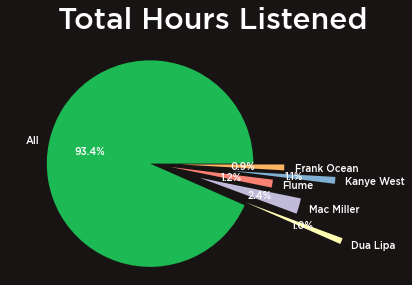

In [26]:
explode = (0, 1, 0.5, 0.2, 0.8, 0.3, )
labels = ['All', 'Dua Lipa', 'Mac Miller' , 'Flume' , 'Kanye West' , 'Frank Ocean']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')

my_circle=plt.Circle( (0,0), 0.7, color='black')
p=plt.gcf()

plt.suptitle('Total Hours Listened', fontsize=30)

plt.show()

In [166]:
v

artistName
Disclosure            0.692490
Adele                 0.697392
Nursery Rhymes 123    0.757413
Kendrick Lamar        0.778472
Claude Debussy        0.829557
Frank Ocean           0.969139
Dua Lipa              1.018654
Kanye West            1.139705
Flume                 1.322783
Mac Miller            2.618555
Name: hours_played, dtype: float64

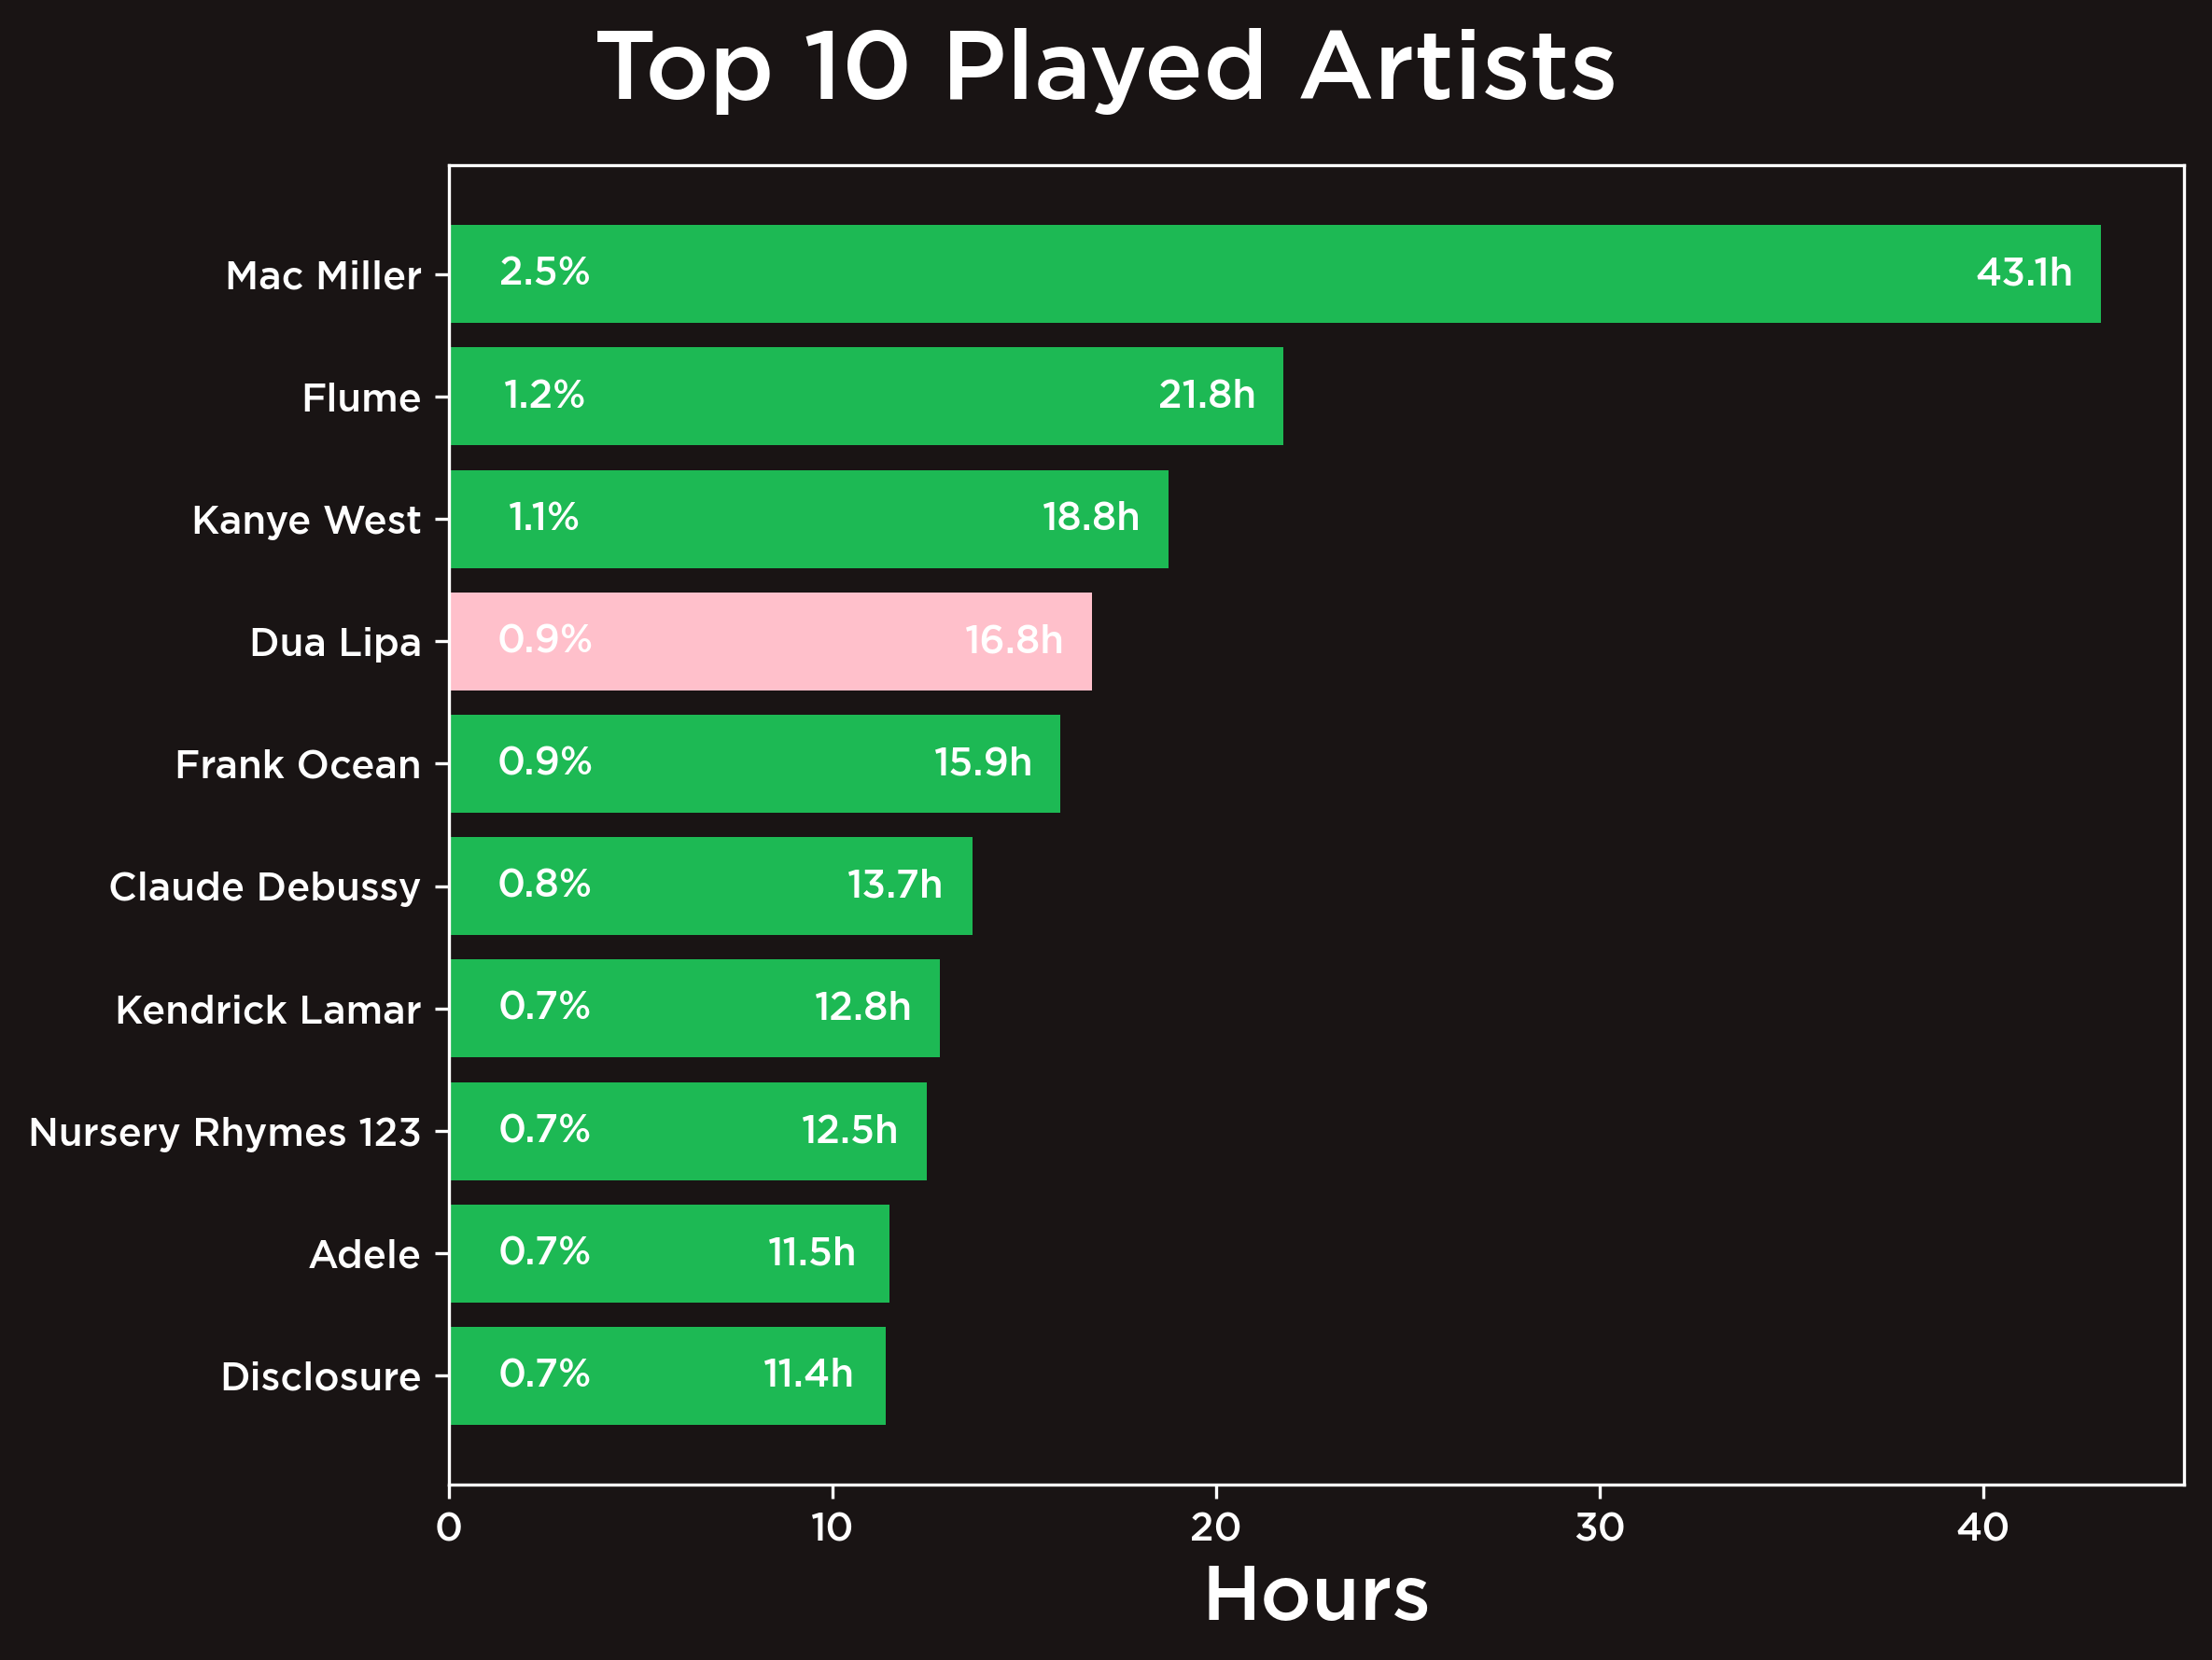

In [212]:


plt.figure(figsize=(8, 6), dpi=300)
bars = plt.barh(get_top_n_artists(df, 10).index, get_top_n_artists(df, 10).hours_played, color = ['#1DB954', 
                                                                                           '#1DB954',
                                                                                          '#1DB954',
                                                                                          '#1DB954',
                                                                                          '#1DB954',
                                                                                          '#1DB954',
                                                                                          '#FFC0CB',
                                                                                          '#1DB954',
                                                                                          '#1DB954',
                                                                                          '#1DB954'])
plt.suptitle('Top 10 Played Artists', fontsize=25)
plt.xlabel('Hours', fontsize=20)


for i, (p, pr) in enumerate(zip(get_top_n_artists(df, 10).index, get_top_n_artists(df, 10).hours_played)):
    h = "%.1f" % round(pr, 2)
    plt.text(s=str(h)+"h", x=get_top_n_artists(df, 10).hours_played[i]-2, y=i, color="w",
             va="center", ha='center', size=10)
    
    pl = "%.1f" % round((((pr/1761.648223))*100), 2)
    plt.text(s=str(pl)+"%", x=2.5, y=i, color="w",
           va="center", ha='center', size=10)


plt.savefig('top-artists.png')


plt.show()

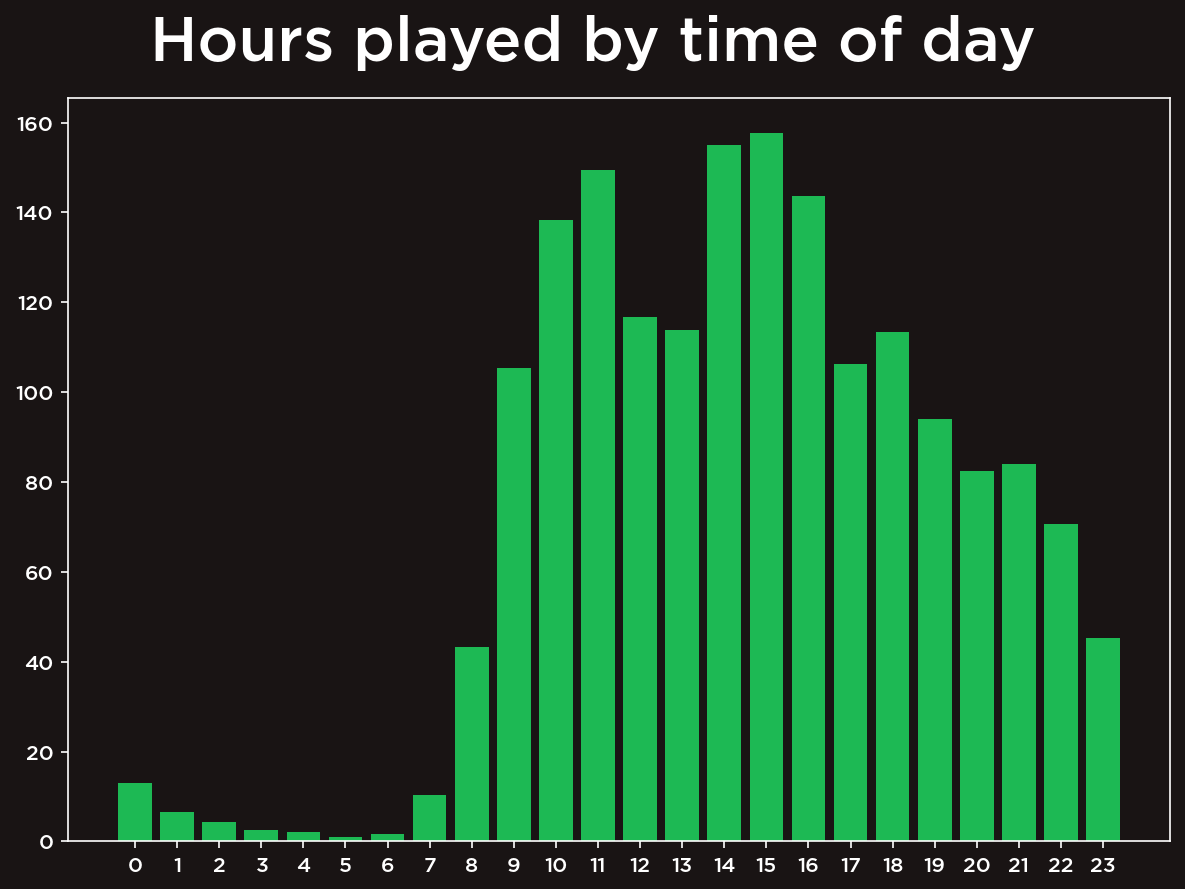

In [198]:
plt.figure(figsize=(8, 6), dpi=150)
plt.bar(get_streamed_hours_by_time_of_day(df).index, get_streamed_hours_by_time_of_day(df).hours_played)
plt.xticks(range(24), range(24))
plt.suptitle('Hours played by time of day', fontsize=30)
plt.show()

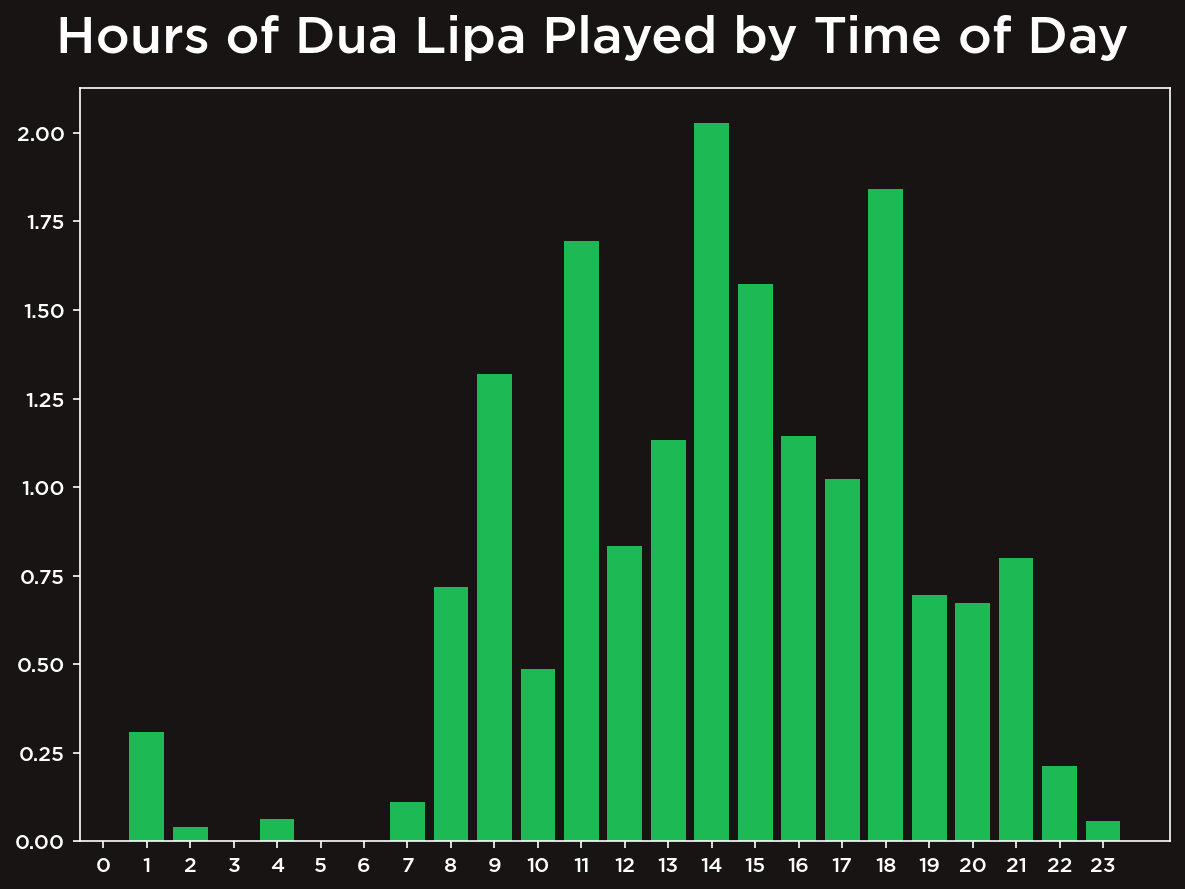

In [214]:
t = df[df.artistName == 'Dua Lipa']

plt.figure(figsize=(8, 6), dpi=150)
plt.bar(get_streamed_hours_by_time_of_day(t).index, get_streamed_hours_by_time_of_day(t).hours_played)
plt.xticks(range(24), range(24))
plt.suptitle('Hours of Dua Lipa Played by Time of Day', fontsize=25)
plt.savefig('hours-tod.png')
plt.show()

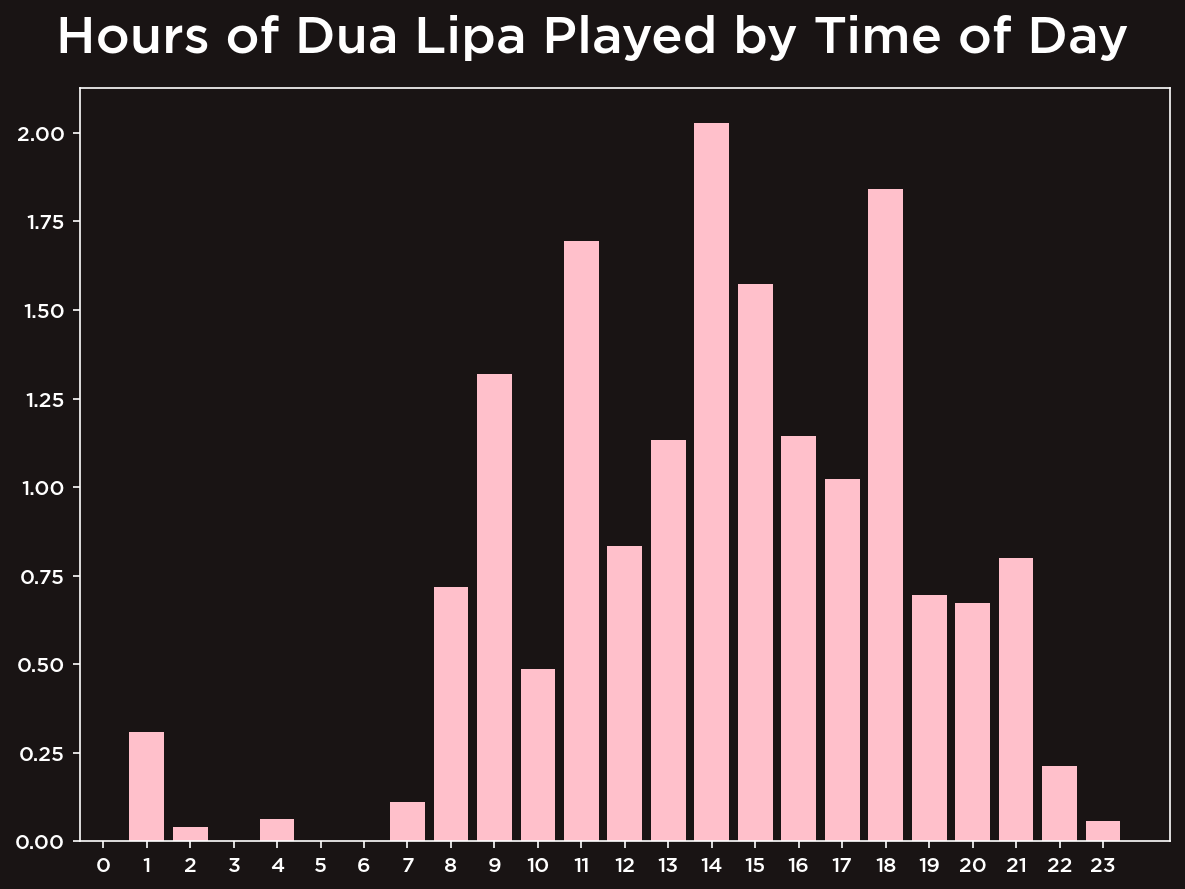

In [213]:
t = df[df.artistName == 'Dua Lipa']

plt.figure(figsize=(8, 6), dpi=150)
plt.bar(get_streamed_hours_by_time_of_day(t).index, get_streamed_hours_by_time_of_day(t).hours_played, color = '#FFC0CB')
plt.xticks(range(24), range(24))
plt.suptitle('Hours of Dua Lipa Played by Time of Day', fontsize=25)
plt.savefig('hours-tod.png')
plt.show()

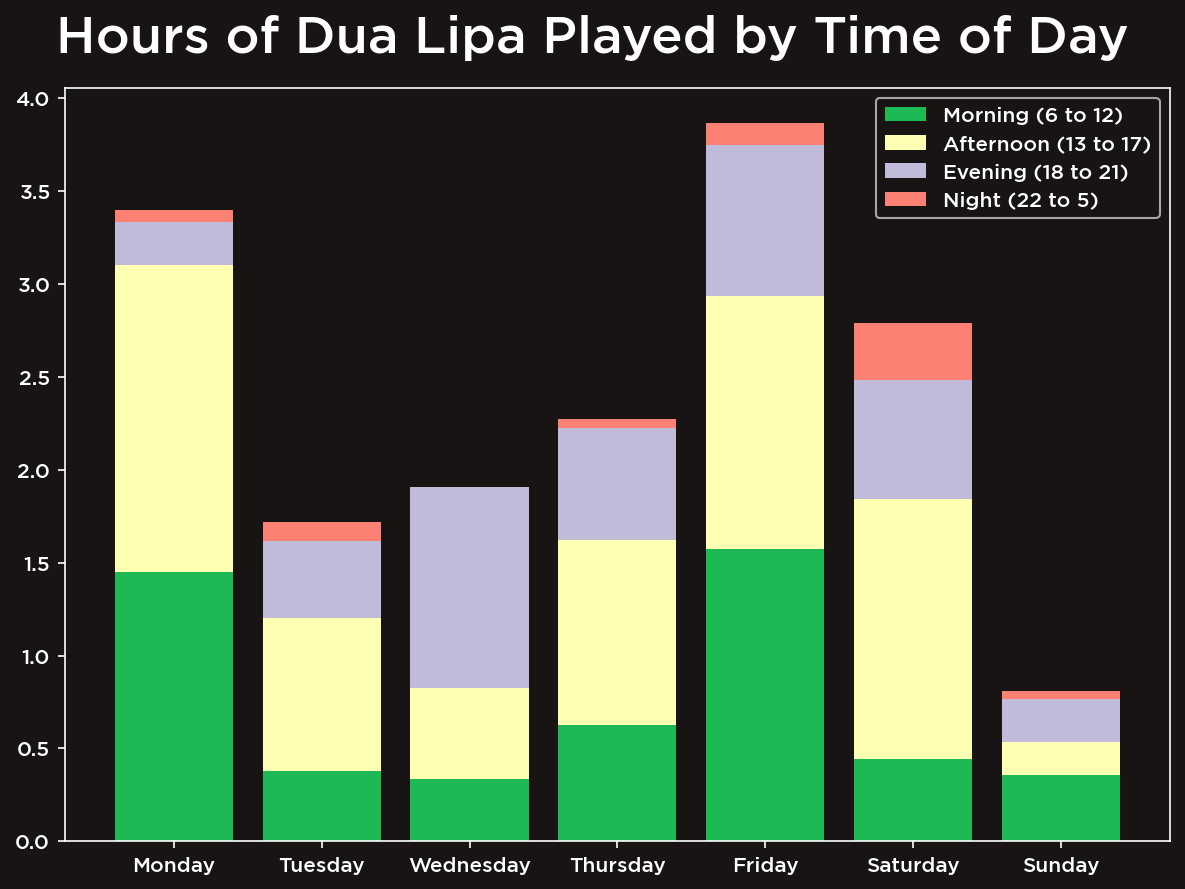

In [215]:
data = get_streamed_hours_by_day_of_week(t)
plt.figure(figsize=(8, 6), dpi=150)
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

        # Plot morning times
plt.bar(data['morning'].index, data['morning'].hours_played, label='Morning (6 to 12)')
# Plot afternoon times
plt.bar(data['afternoon'].index,
    data['afternoon'].hours_played,
    bottom=data['morning'].hours_played,
    label='Afternoon (13 to 17)')
# Plot evening times
plt.bar(data['evening'].index,
    data['evening'].hours_played,
    bottom=data['morning'].hours_played+data['afternoon'].hours_played,
    label='Evening (18 to 21)')
# Plot night times
plt.bar(data['night'].index, data['night'].hours_played,
        bottom=data['morning'].hours_played +
        data['afternoon'].hours_played +
        data['evening'].hours_played,
        label='Night (22 to 5)')
plt.xticks(range(7), days_labels)
plt.suptitle('Hours of Dua Lipa Played by Time of Day', fontsize=25)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('day-of-the-week-plot.png')
plt.show()

In [17]:
### hist of dua lipa played by day and avergae heart rate

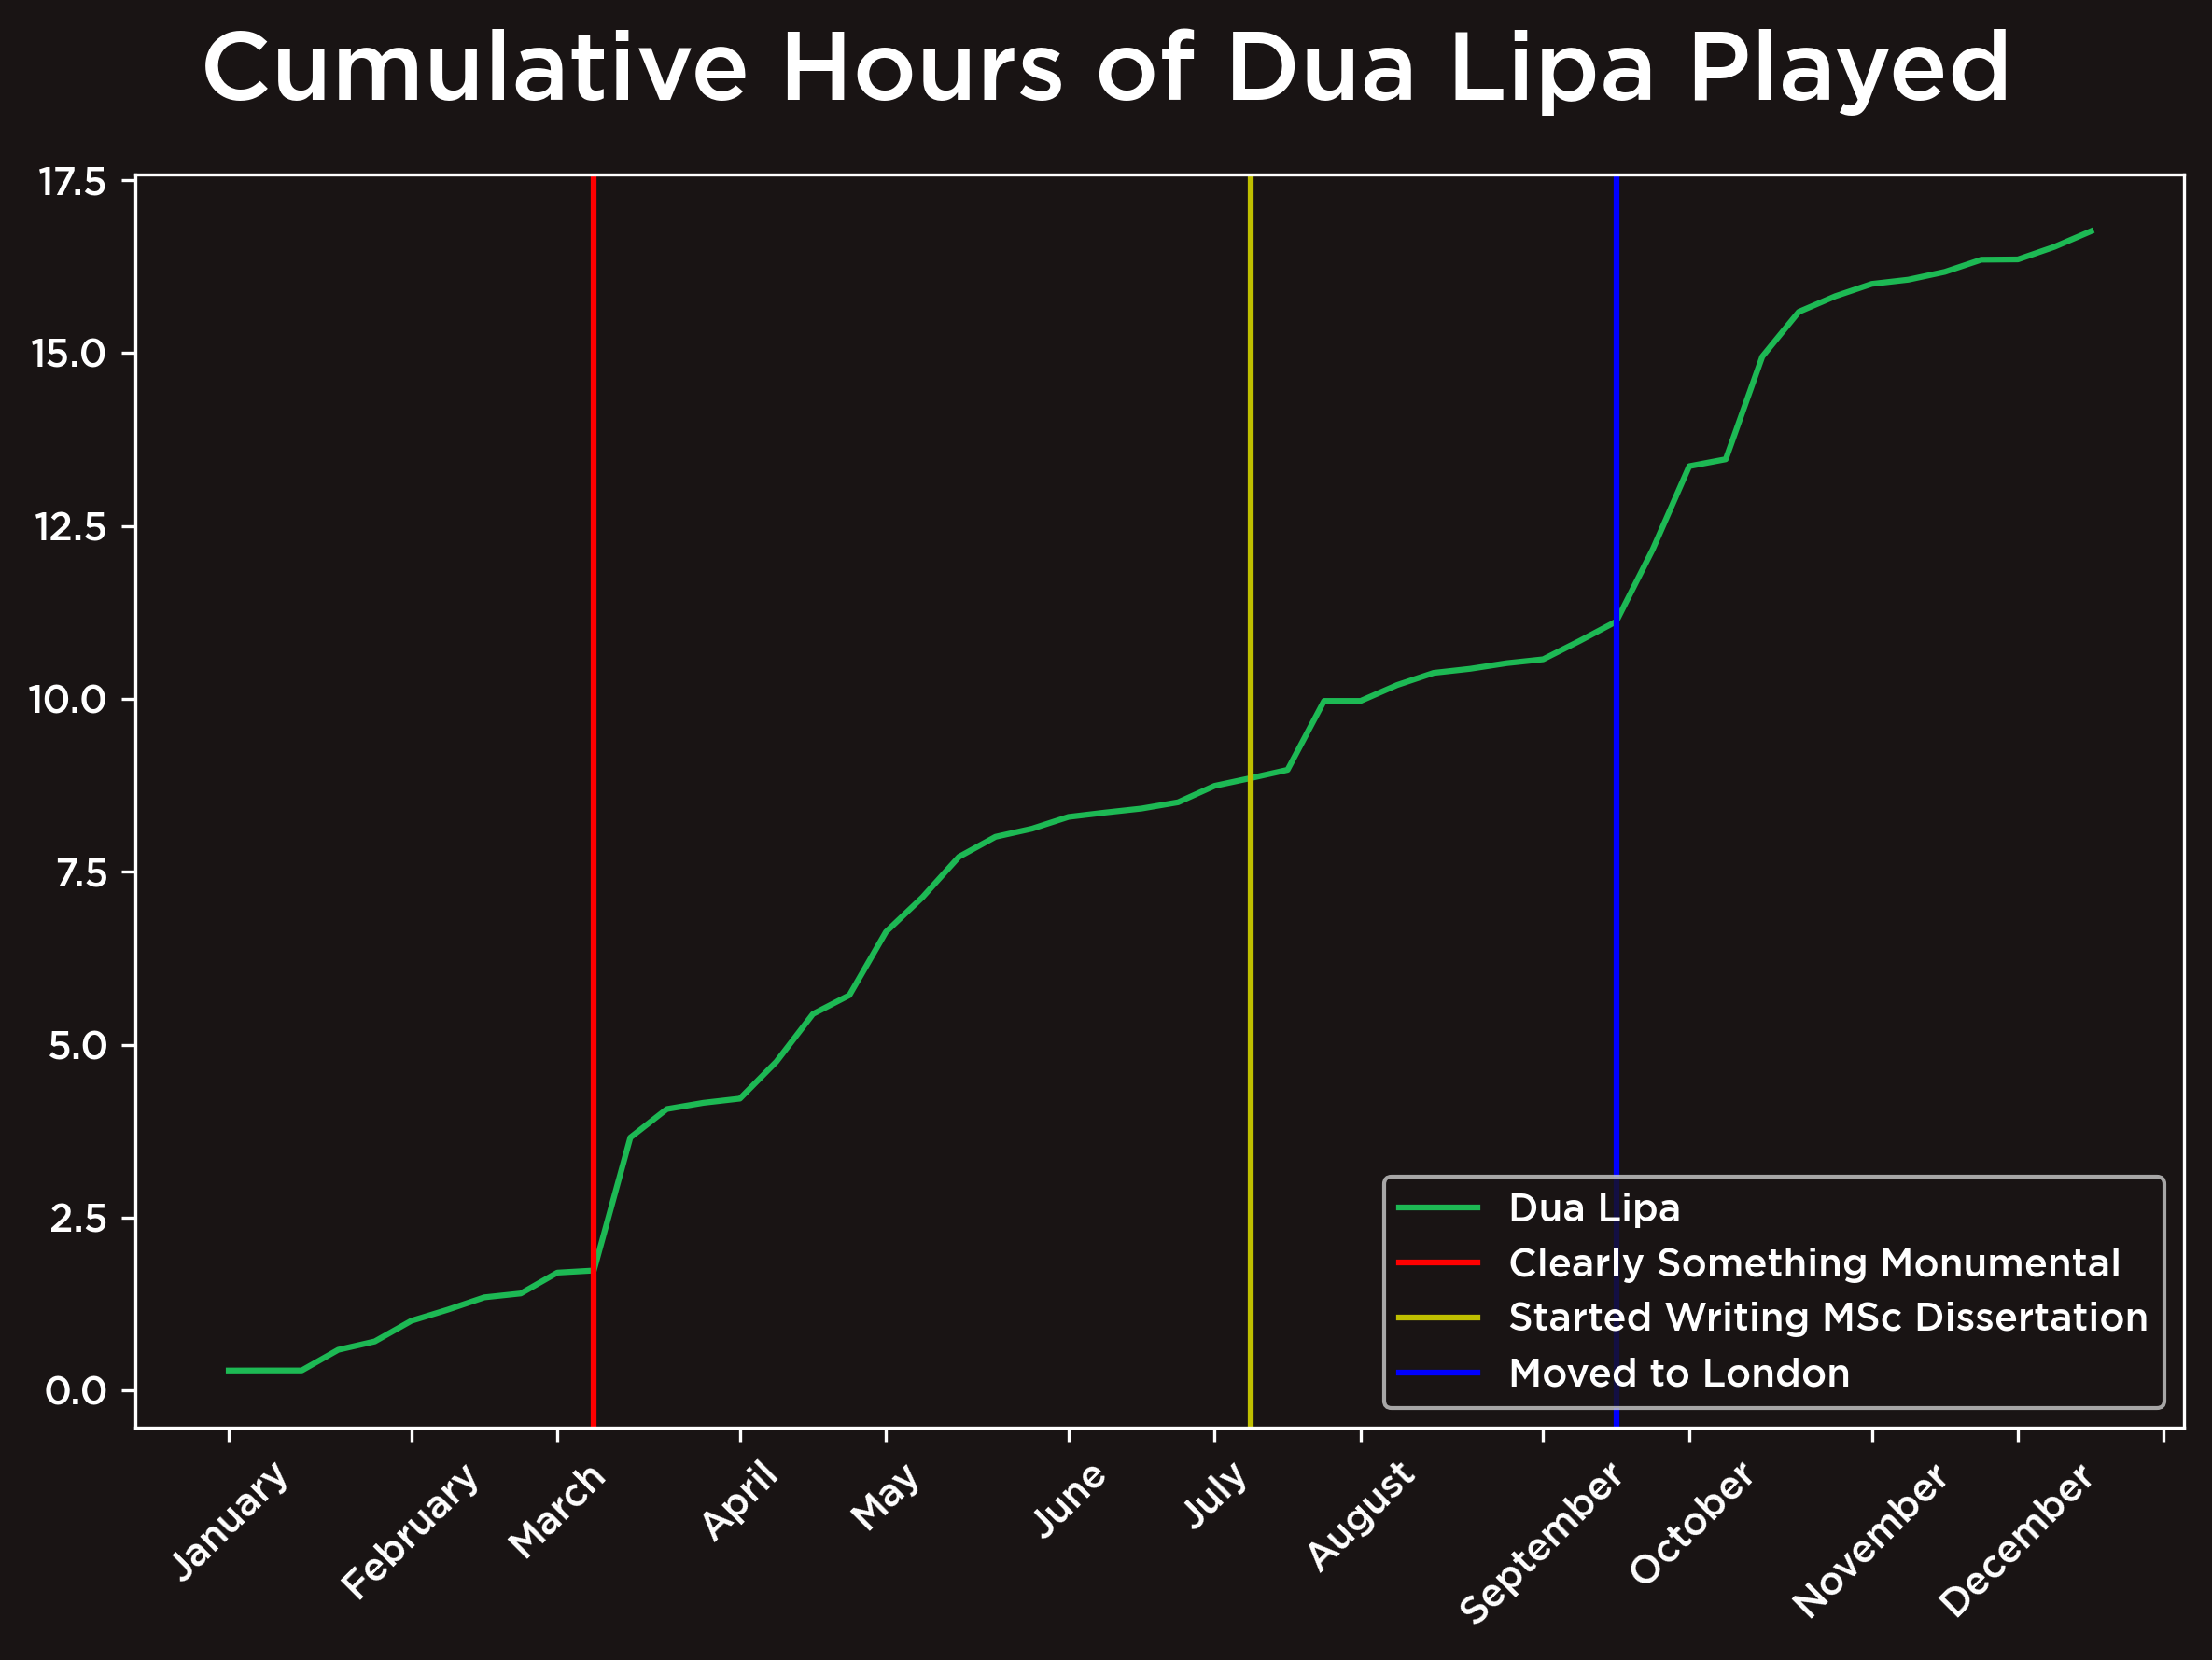

In [217]:
data = get_cumsum_by_week(df, 10)
top_artists = get_top_n_artists(t, 10)

plt.figure(figsize=(8, 6), dpi=300)
for artist in top_artists.index:
    selected_artist = data[data.index == artist]
    plt.plot(range(52), selected_artist.hours_played, label=artist)

x_labels = ['January', 'February', 'March', 'April', 'May', 'June','July',
    'August', 'September', ' October', 'November', 'December', '']
x_ticks = [0, 5, 9, 14, 18, 23, 27, 31, 36, 40, 45, 49, 53]

plt.axvline(x = 10, color = 'r', label = 'Clearly Something Monumental')
plt.axvline(x = 28, color = 'y', label = 'Started Writing MSc Dissertation')
plt.axvline(x = 38, color = 'b', label = 'Moved to London')

plt.xticks(x_ticks, x_labels, rotation='45')
plt.legend(loc = 'lower right')
plt.suptitle('Cumulative Hours of Dua Lipa Played', fontsize=25)
plt.savefig('cumulative.png')
plt.show()

In [136]:
index number 33 for my bday

,hours_played
artist_name,
Adele,0.000000
Adele,0.000000
Adele,0.000398
Adele,0.062813
Adele,0.062813
...,...
Nursery Rhymes 123,12.152271
Nursery Rhymes 123,12.152271
Nursery Rhymes 123,12.462028


C:\Users\gabri\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


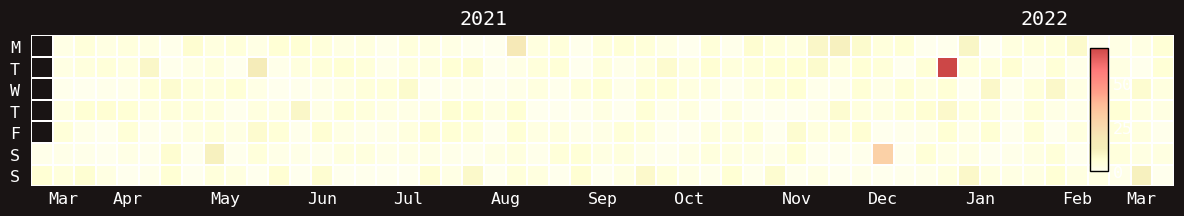

In [20]:
july.heatmap(df.date, df.hours_played*100, colorbar=True)
plt.show()